# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [230]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [231]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [232]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [233]:
data = pd.read_csv("BankChurners.csv")

df = data.copy()

#since for the model we don't need client id (CLIENTNUM), we can drop it
df.drop('CLIENTNUM', axis=1, inplace=True)

## Data Overview

- Observations
- Sanity checks

In [234]:
#lets visualize the data.
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [235]:
# Lets check the data shape
df.shape

(10127, 20)

In [236]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [237]:
# checking for missing values
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [238]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [239]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [240]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [241]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [242]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

The Total_Trans_Amt has a mean of 4404.086303939963 and a medean of 3899.0


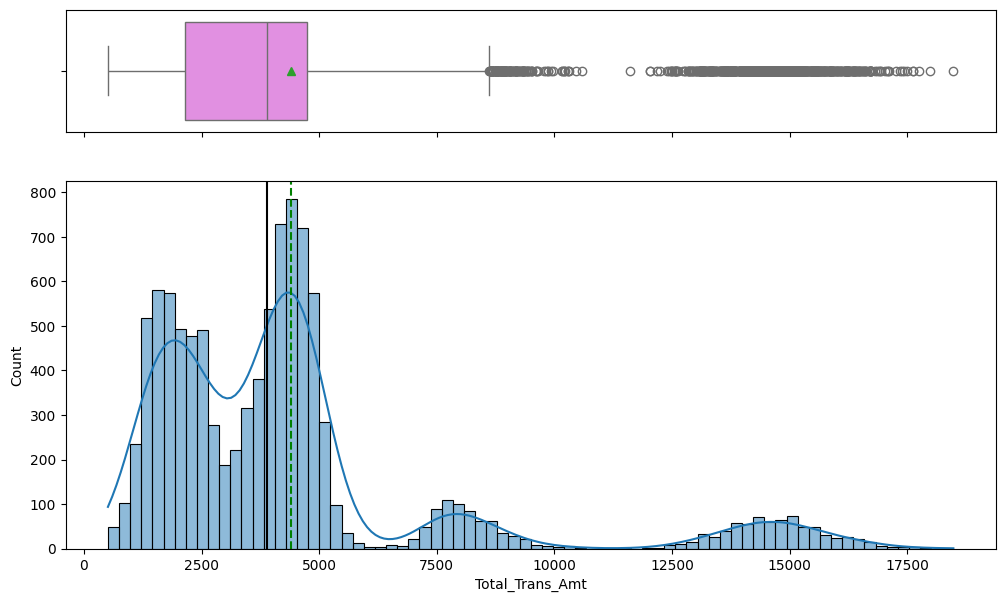

In [243]:
#lets ana;use the total transtion amount
print(f"The Total_Trans_Amt has a mean of {df['Total_Trans_Amt'].mean()} and a medean of {df['Total_Trans_Amt'].median()}")
histogram_boxplot(df, "Total_Trans_Amt", kde=True)

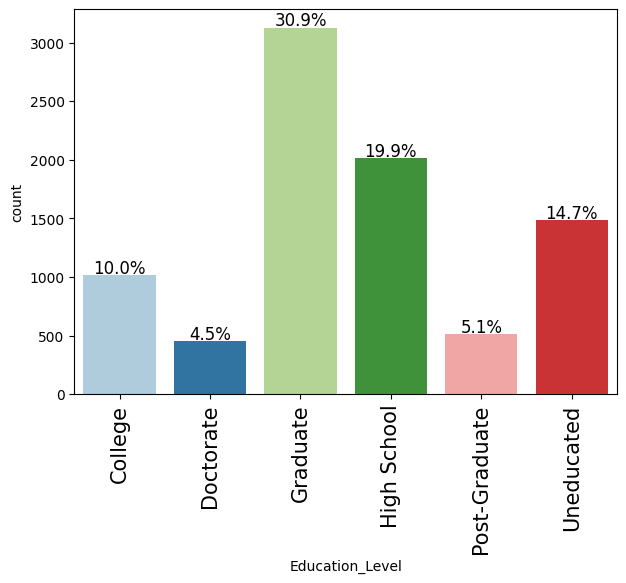

In [244]:
#now lets check the education level
labeled_barplot(df, "Education_Level", True)

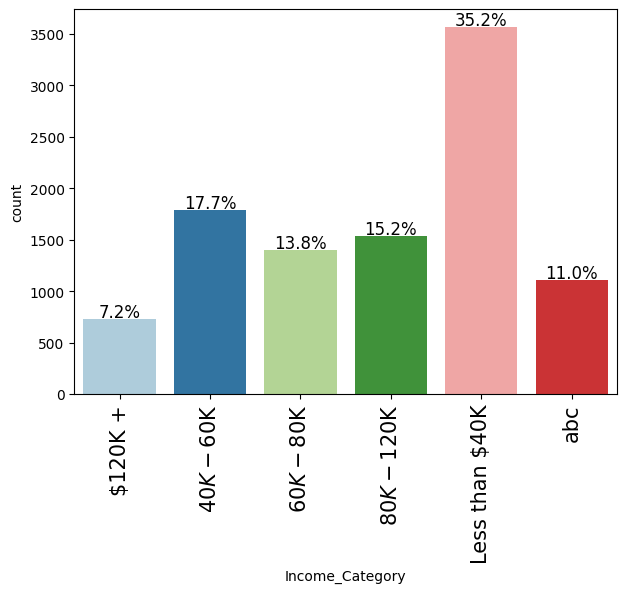

In [245]:
#now lets check the education level
labeled_barplot(df, "Income_Category", True)

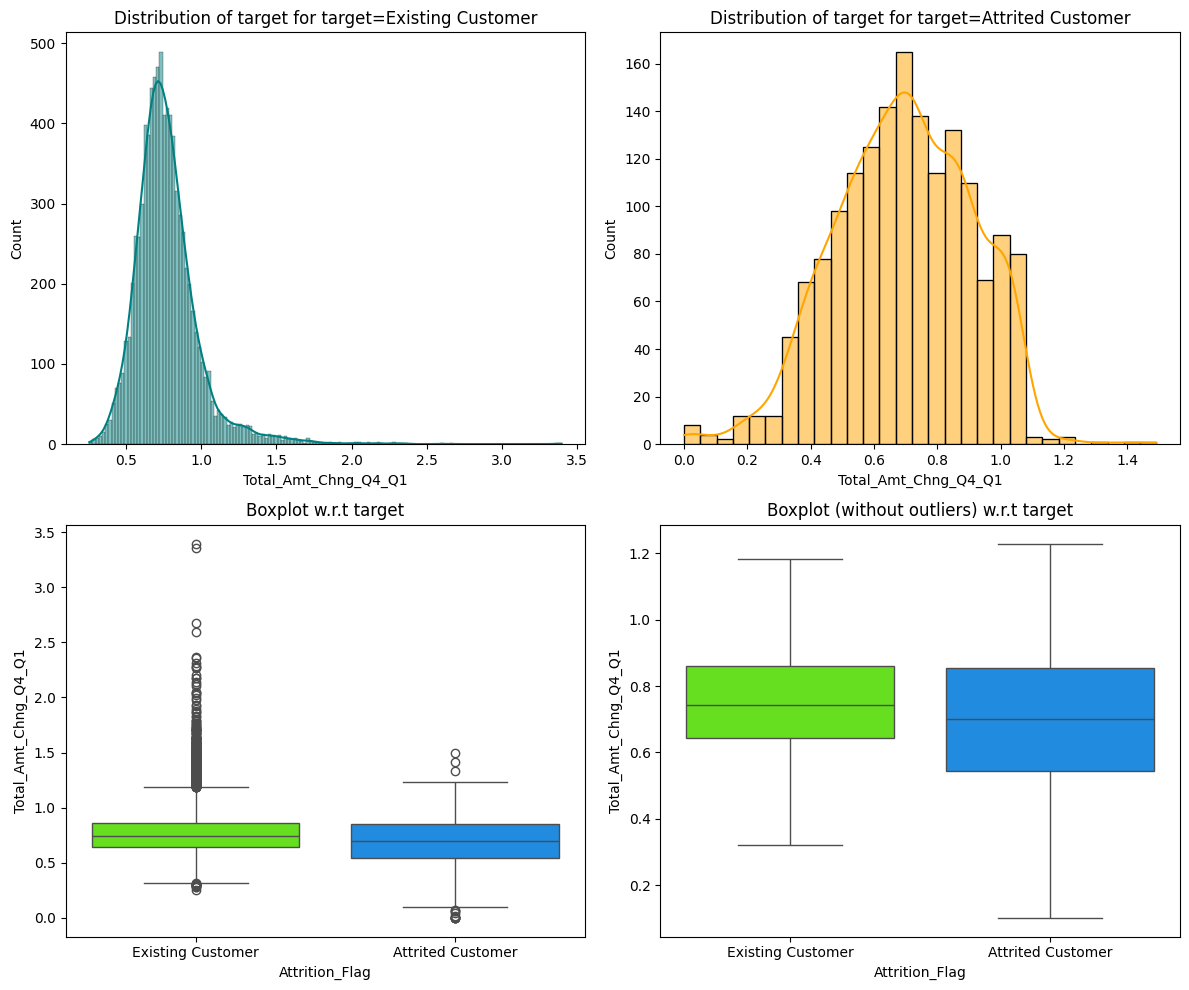

In [246]:
# we need to check how the change in transaction amout relates to the atrition flag.
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

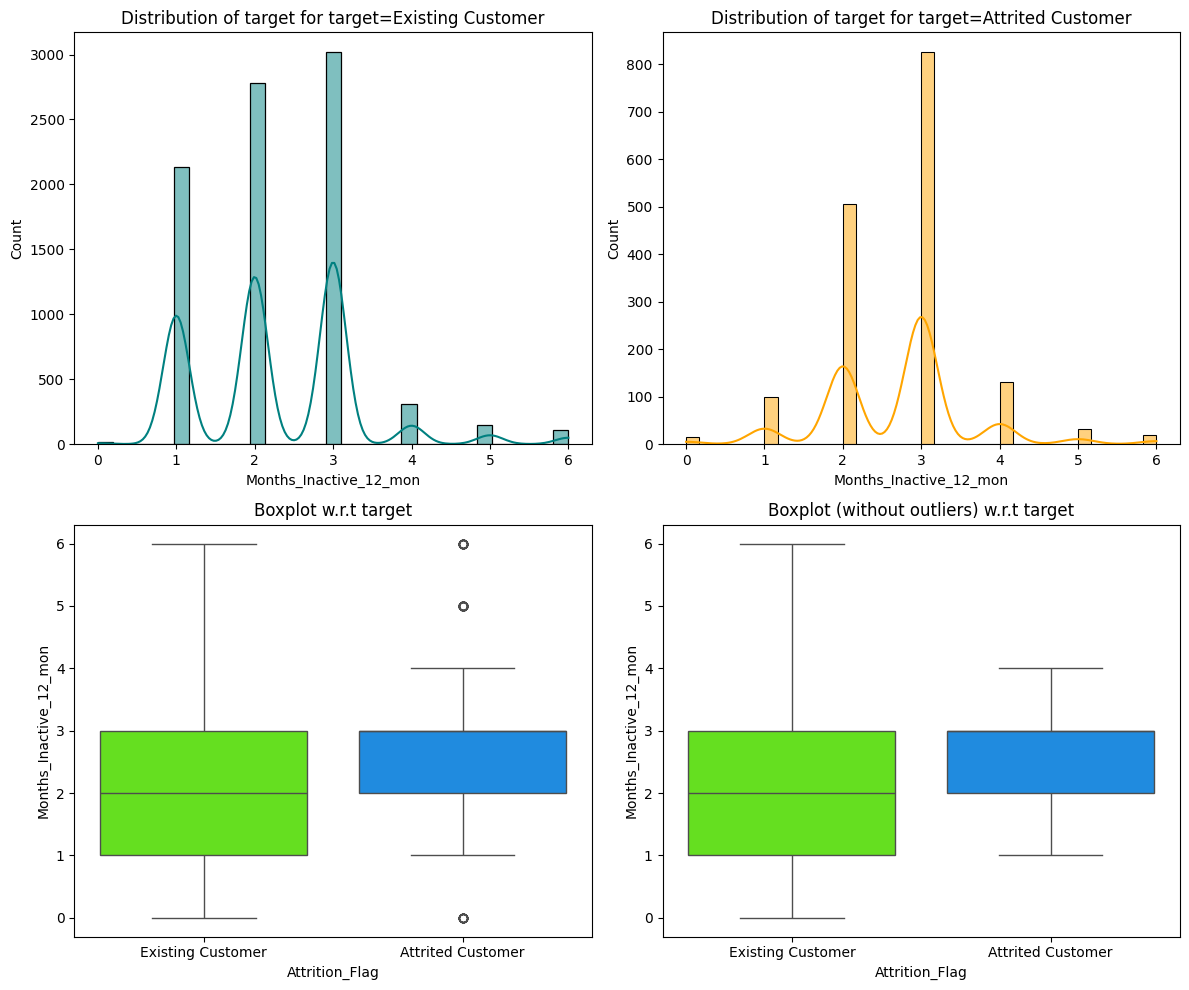

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


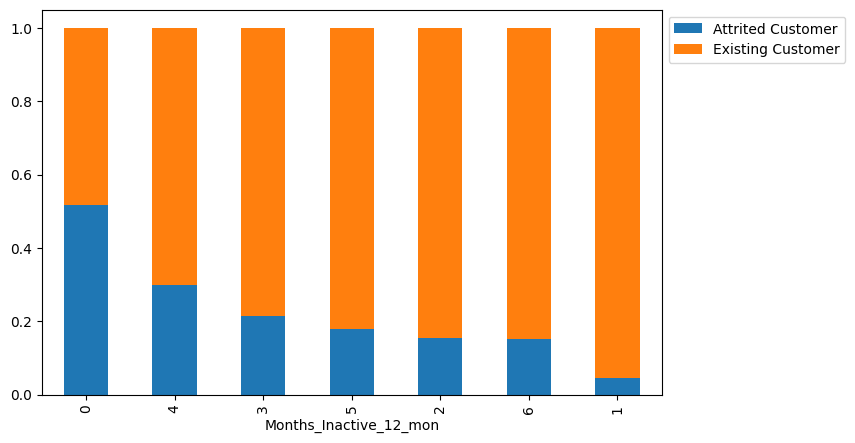

In [247]:
# we need to check how the change in inactivity relates to the atrition flag.
distribution_plot_wrt_target(df, "Months_Inactive_12_mon", "Attrition_Flag")
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

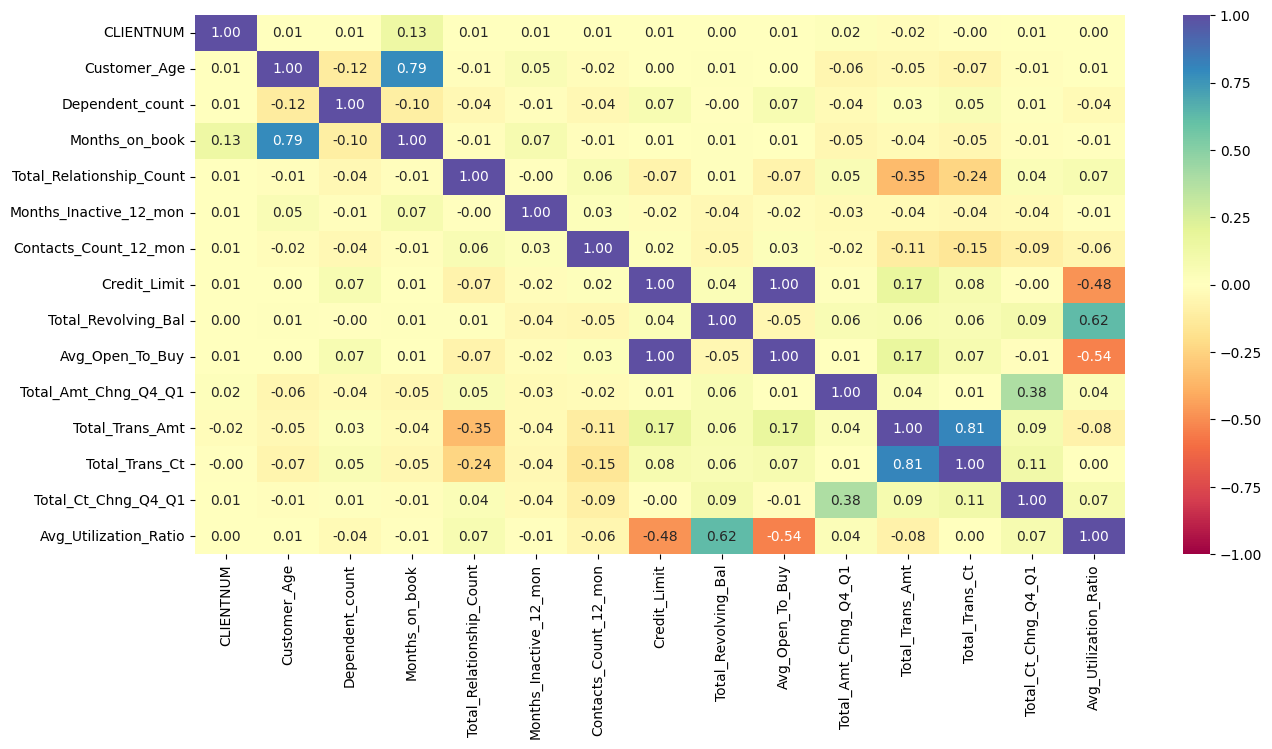

In [248]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Answering the questions that were posted

1. How is the total transaction amount distributed?
    
    The distribution of the total transaction amount (Total_Trans_Amt) shown in the image has a right-skewed distribution, with the majority of data points concentrated around the lower values and a tail extending towards the higher transaction amounts. Here's a more detailed breakdown:

    Using the Box Plot (Top), we can conclude the following

    * The median (3899.0) is lower than the mean (4404.1), indicating a right-skewed distribution.
    * There are several outliers on the higher end, as shown by the individual points beyond the right whisker of the box plot.
    
    Using Histogram (Bottom), we can conclude the following:

    * The distribution is multimodal, with a significant peak near 4000-5000 and smaller peaks at 7000-7500 and 14000-15000.
    * The tallest bar is centered around the 4000-5000 range.
    * The kernel density estimate (blue curve) overlays the histogram, showing a similar pattern of peaks and a long tail on the right.
    
    In conclusion, the total transaction amount has a non-normal, multimodal, and right-skewed distribution, with many lower transaction amounts and a smaller number of much higher values.
    

2. What is the distribution of the level of education of customers?

    The chart depicts the distribution of customer education levels as follows:

    * Graduate: 30.9%
    * High School: 19.9%
    * Uneducated: 14.7%
    * College: 10.0%
    * Post-Graduate: 5.1%
    * Doctorate: 4.5%


    This means that the majority of the customers have completed graduate-level education (30.9%), followed by those with a high school education (19.9%). Uneducated customers make up 14.7%, while those who have completed college account for 10%. Post-graduates and doctorate holders make up smaller portions at 5.1% and 4.5%, respectively.


3. What is the distribution of the level of income of customers?

    Based on the image you provided, the distribution of the levels of income of customers is as follows:

    * Less than $40K: 35.2%
    * $40K - 60K: 17.7%
    * $60K - 80K: 13.8%
    * $80K - 120K: 15.2%
    * $120K+: 7.2%
    * "abc" (this may be a miscategorized or erroneous value): 11.0%. (PS: before building the model I need to adress this problem)

    The majority of customers fall within the "Less than $40K" income category, followed by significant representation in the $40K - 60K and $80K - 120K ranges. The presence of the "abc" category suggests potential data entry issues.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

    The change in transaction amount between Q4 and Q1 (Total_Amt_Chng_Q4_Q1) varies by customer account status (Attrition_Flag) as follows:

    * Existing Customers: The distribution is skewed right, with most existing customers experiencing minimal change in transaction amounts, clustered around a value of 1. Outliers are present but uncommon.

    * Attrited Customers: The distribution is broader and closer to normal, with most attrited customers showing transaction changes between 0.6 and 1.0. The median change is slightly lower than for existing customers, indicating more variability in spending behavior among attrited customers.

    Boxplot comparisons show that existing customers generally have higher and more consistent transaction change values, while attrited customers display more spread-out and varied changes, with fewer extreme outliers. This suggests that customers who eventually leave exhibit more erratic transaction patterns.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
    
    The number of months a customer was inactive in the last 12 months varies significantly by account status:

    * Attrited Customers tend to have higher months of inactivity, with the majority peaking at around 3 months of inactivity.
    * Existing Customers generally have fewer months of inactivity, with most being active for 2-3 months or less.
    
    Attrition increases notably after 3 months of inactivity, indicating a strong correlation between higher inactivity and a higher likelihood of account attrition.

6. What are the attributes that have a strong correlation with each other?

    * Avg_Open_To_Buy and Credit_Limit: 1.00 (positive correlation).
    * Total_Trans_Amt and Total_Trans_Ct: 0.81 (positive correlation).
    * Months_on_book and Customer_age: 0.79 (positive correlation).
    * Avg_Utilization_Ratio and Total_Revolving_Bal: 0.62 (positive correlation).
    * Avg_Open_To_Buy and Avg_Utilization_Ratio: 0.54 (negative correlation).

## Data Pre-processing

In [249]:
#lets prep the model data from the data
model_df = df.copy()

# lets change the attration flag to a numeric number
model_df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
model_df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Missing value imputation




Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


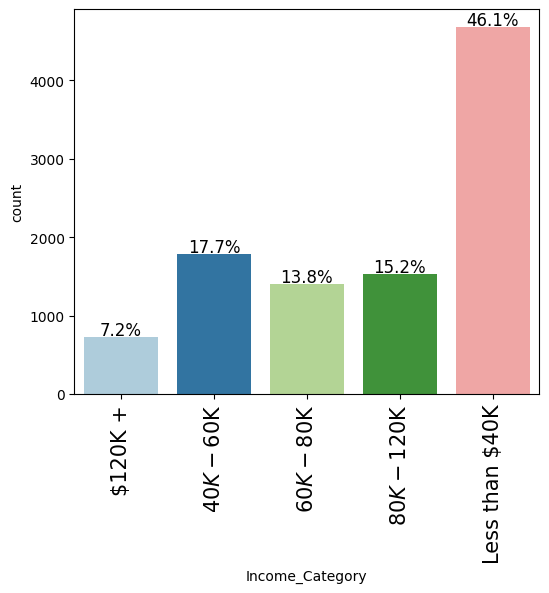

In [250]:
#There are 3 corrections that we need to make
# we have missing values on the fields Education_Level and Marital_Status
# we have an invalid Income_Category

# We can test out multiple options, First lets try to just use a simple imputer for all the variables, 
#if we are unable to get a usable model, we can review the strategu and drop some data.
imputer = SimpleImputer(strategy="most_frequent")
required_columns = ["Education_Level", "Marital_Status", "Income_Category"]

#lets replace the income abc with nan so we can use the imputer.
model_df["Income_Category"].replace("abc", np.nan, inplace=True)

#lets run the imputer
model_df[required_columns] = imputer.fit_transform(model_df[required_columns])


#lets check to see if the data is corrected
# checking for missing values
print(model_df.isnull().sum())

labeled_barplot(model_df, "Income_Category", True)

In [251]:
#finaly lets get the dummies for the model data
model_df = pd.get_dummies(model_df, drop_first=True)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [252]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Main goals, and plan to optimize:

Before we start we need to analyse the potential issues, and what are the elemenes we want to maximize.

The model can make two types of mistakes:

* False Positive: Predicting that a customer will churn when, in fact, they won’t.
* False Negative: Predicting that a customer will stay when, in reality, they will churn.


#### Which scenario is more critical?
For the bank, the False Negatives are far more concerning. If my model predicts that a customer will not churn, but they actually do, the bank could lose a valuable customer—a significant asset. That's something I need to minimize as much as possible.

#### How can I reduce False Negatives?
To reduce the risk of missing out on these valuable customers, I need to focus on increasing the model’s Recall. By maximizing Recall, I can ensure that the model correctly identifies more of the customers who are at risk of churning. The higher the Recall, the fewer False Negatives I’ll have, and this means the bank will have a better chance of identifying and retaining these at-risk customers before they leave.

My goal with this model is clear: to help the bank proactively protect its customer base by identifying those most likely to churn, allowing us to take action and retain them.

### Model Building with original data

In [253]:
#Before we build the model we need to split the data
X = model_df.drop(["Attrition_Flag"], axis=1)
y = model_df["Attrition_Flag"]

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


Sample code for model building with original data

In [254]:
#before we start lets create a dictionary so we can store all the and their results
all_models = {}

In [255]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))
    all_models[f"Original Data[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
AdaBoost: 0.826844262295082
XGBoost: 1.0
GradientBoost: 0.875

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
AdaBoost: 0.852760736196319
XGBoost: 0.901840490797546
GradientBoost: 0.8558282208588958


### Model Building with Oversampled data


In [256]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [257]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))
    all_models[f"Oversampled Data:[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9974504804863699
Random forest: 1.0
AdaBoost: 0.9690135320651108
XGBoost: 1.0
GradientBoost: 0.980976662090606

Validation Performance:

Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
AdaBoost: 0.901840490797546
XGBoost: 0.911042944785276
GradientBoost: 0.8926380368098159


### Model Building with Undersampled data

In [258]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [259]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))
    all_models[f"Undersampled Data[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
AdaBoost: 0.9528688524590164
XGBoost: 1.0
GradientBoost: 0.9805327868852459

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
AdaBoost: 0.9601226993865031
XGBoost: 0.9693251533742331
GradientBoost: 0.9570552147239264


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [260]:
#lets build a dictonary with this configurations, to make it easy for us to run it for all models

param_grid_configs = {}

param_grid_configs["Bagging"] = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
param_grid_configs["Random forest"] = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
param_grid_configs["AdaBoost"] = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
param_grid_configs["XGBoost"] = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
param_grid_configs["GradientBoost"] = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}




#### Sample tuning method for Decision tree with original data

In [261]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

print("\n" "Training Performance:" "\n")
for name, model in models:
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_configs[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))
    all_models[f"Tuned Original Data[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
AdaBoost: 0.826844262295082
XGBoost: 1.0
GradientBoost: 0.875

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
AdaBoost: 0.852760736196319
XGBoost: 0.901840490797546
GradientBoost: 0.8558282208588958


#### Sample tuning method for Decision tree with oversampled data

In [262]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

print("\n" "Training Performance:" "\n")
for name, model in models:
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_configs[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))
    all_models[f"Tuned Oversampled Data[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9974504804863699
Random forest: 1.0
AdaBoost: 0.9690135320651108
XGBoost: 1.0
GradientBoost: 0.980976662090606

Validation Performance:

Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
AdaBoost: 0.901840490797546
XGBoost: 0.911042944785276
GradientBoost: 0.8926380368098159


#### Sample tuning method for Decision tree with undersampled data

In [263]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

print("\n" "Training Performance:" "\n")
for name, model in models:
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_configs[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))
    all_models[f"Tuned Undersampled Data[{name}]"] = model

print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
AdaBoost: 0.9528688524590164
XGBoost: 1.0
GradientBoost: 0.9805327868852459

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
AdaBoost: 0.9601226993865031
XGBoost: 0.9693251533742331
GradientBoost: 0.9570552147239264


## Model Comparison and Final Model Selection

In [264]:
for name, model in all_models.items():
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Original Data[Bagging]: 0.8128834355828221
Original Data[Random forest]: 0.7975460122699386
Original Data[AdaBoost]: 0.852760736196319
Original Data[XGBoost]: 0.901840490797546
Original Data[GradientBoost]: 0.8558282208588958
Oversampled Data:[Bagging]: 0.8496932515337423
Oversampled Data:[Random forest]: 0.8680981595092024
Oversampled Data:[AdaBoost]: 0.901840490797546
Oversampled Data:[XGBoost]: 0.911042944785276
Oversampled Data:[GradientBoost]: 0.8926380368098159
Undersampled Data[Bagging]: 0.9294478527607362
Undersampled Data[Random forest]: 0.9386503067484663
Undersampled Data[AdaBoost]: 0.9601226993865031
Undersampled Data[XGBoost]: 0.9693251533742331
Undersampled Data[GradientBoost]: 0.9570552147239264
Tuned Original Data[Bagging]: 0.8128834355828221
Tuned Original Data[Random forest]: 0.7975460122699386
Tuned Original Data[AdaBoost]: 0.852760736196319
Tuned Original Data[XGBoost]: 0.901840490797546
Tuned Original Data[GradientBoost]: 0.8558282208588958
Tuned Oversampled Data[B

### Test set final performance

In [265]:
for name, model in all_models.items():
    scores_val = recall_score(y_test, model.predict(X_test))
    print("{}: {}".format(name, scores_val))


Original Data[Bagging]: 0.8646153846153846
Original Data[Random forest]: 0.7938461538461539
Original Data[AdaBoost]: 0.8892307692307693
Original Data[XGBoost]: 0.9292307692307692
Original Data[GradientBoost]: 0.8861538461538462
Oversampled Data:[Bagging]: 0.8892307692307693
Oversampled Data:[Random forest]: 0.8923076923076924
Oversampled Data:[AdaBoost]: 0.916923076923077
Oversampled Data:[XGBoost]: 0.9476923076923077
Oversampled Data:[GradientBoost]: 0.9415384615384615
Undersampled Data[Bagging]: 0.9476923076923077
Undersampled Data[Random forest]: 0.9569230769230769
Undersampled Data[AdaBoost]: 0.96
Undersampled Data[XGBoost]: 0.9569230769230769
Undersampled Data[GradientBoost]: 0.9661538461538461
Tuned Original Data[Bagging]: 0.8646153846153846
Tuned Original Data[Random forest]: 0.7938461538461539
Tuned Original Data[AdaBoost]: 0.8892307692307693
Tuned Original Data[XGBoost]: 0.9292307692307692
Tuned Original Data[GradientBoost]: 0.8861538461538462
Tuned Oversampled Data[Bagging]: 

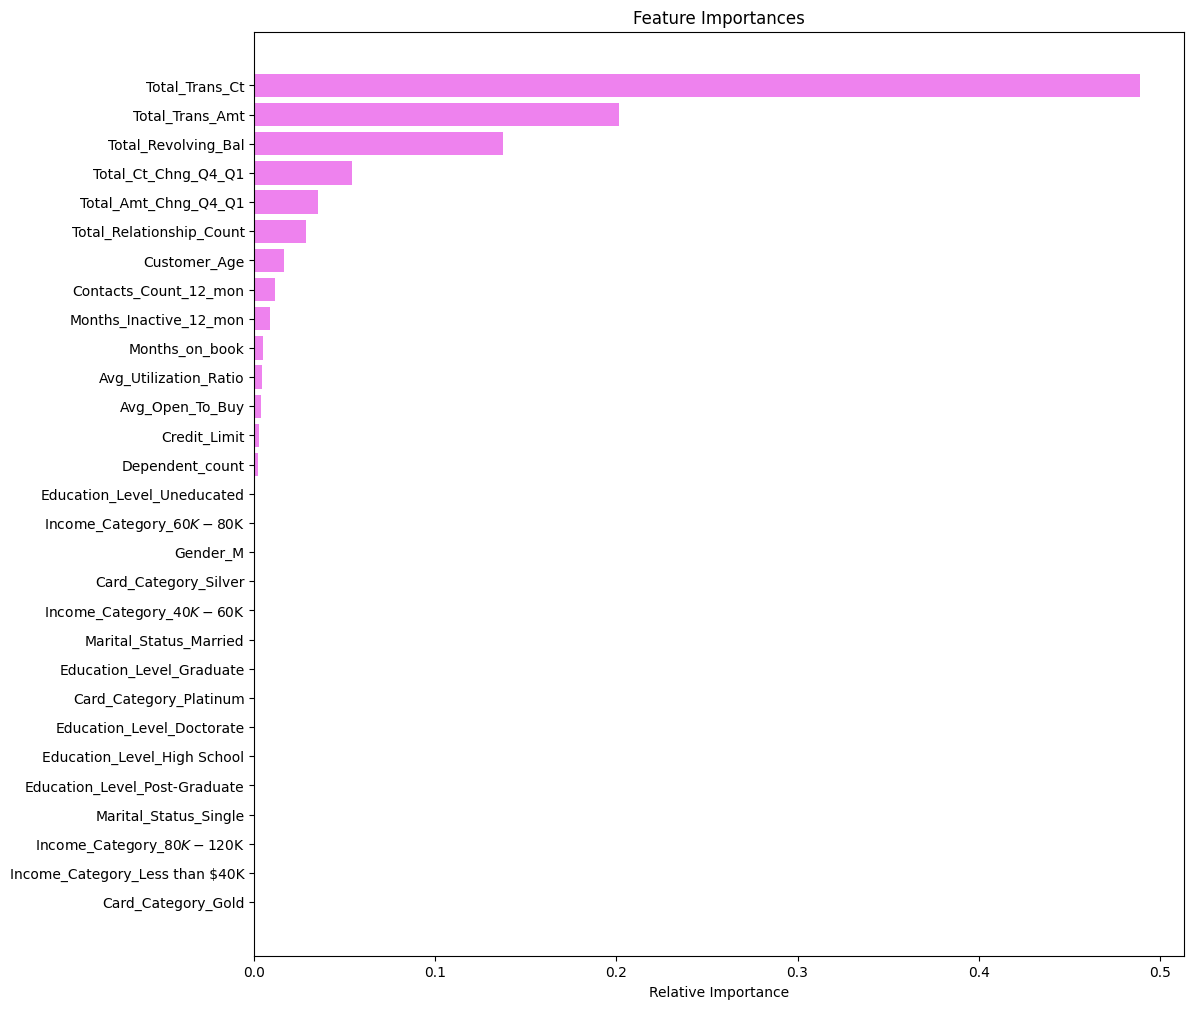

In [266]:
#now that we know the model with the best score, lets use it understand the feature importance.
model = all_models["Undersampled Data[GradientBoost]"]
feature_names = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

## Final Model Selection

After evaluating multiple models on their ability to predict customer churn, the final model selected was based on feature importance analysis and performance metrics. The model that stood out was the **Undersampled Data[GradientBoost]** it has the best recall and trying to tune it did not show any improvements on the model.

## Key Insights from the Data

1. **Transaction Behavior**: 
   The most critical feature for predicting customer churn was `Total_Trans_Ct` (Total Transaction Count). Customers with fewer transactions were more likely to churn, which highlights the importance of transaction engagement. A decline in the number of transactions could be a key indicator of a customer potentially leaving the service. Encouraging more frequent use of the card might reduce churn rates.

2. **Total Transaction Amount**: 
   Following transaction count, `Total_Trans_Amt` (Total Transaction Amount) was another significant predictor. This suggests that not just the frequency, but the total amount spent by customers plays a vital role in their likelihood of retention. Engaging high-value customers with rewards or exclusive offers could help retain them.

3. **Credit Utilization**:
   Features such as `Total_Revolving_Bal` (Total Revolving Balance) and `Avg_Open_To_Buy` were also important but to a lesser extent. These reflect the customer’s credit usage and availability. Customers with higher revolving balances or limited available credit tend to churn more, possibly due to financial stress or dissatisfaction with credit limits. Offering personalized financial advice or credit limit adjustments could mitigate this risk.

4. **Customer Relationship Management**:
   `Total_Relationship_Count` and `Months_on_book` were moderately important features. Longer relationships and higher touchpoints (e.g., communication and service interaction) with the bank are linked to higher retention. This implies that building strong, long-term relationships with customers should be a priority for the bank's CRM strategies.

5. **Demographic Factors**:
   Interestingly, demographic variables such as `Income_Category` and `Education_Level` had lower importance in the model. This indicates that transactional and relationship behaviors are stronger indicators of churn than demographic characteristics, which suggests that targeted marketing and retention efforts should focus on behavior rather than broad demographic groups.

## Business Recommendations

1. **Increase Customer Engagement**:
   The bank should focus on encouraging more transactions from customers, especially those with declining transaction counts. This could be achieved through personalized incentives such as cashback rewards, discounts, or promotional offers for frequent usage.

2. **Monitor High-Value Customers**:
   Customers with higher transaction amounts represent a critical segment for retention. The bank should ensure that these customers feel valued through loyalty programs and exclusive perks.

3. **Financial Health and Credit Management**:
   To reduce churn among customers with high revolving balances, the bank could offer financial health check-ups, provide personalized credit management services, or offer flexible repayment options to alleviate potential financial stress.

4. **Strengthen Relationships**:
   Investing in CRM systems to track and improve customer relationship metrics could lead to better retention. Proactive outreach, regular check-ins, and providing exceptional customer service can increase `Total_Relationship_Count` and reduce the likelihood of churn.

5. **Behavioral Focus in Retention Campaigns**:
   Given the low importance of demographic factors, the bank should prioritize behavior-based segmentation for retention campaigns. Identifying and addressing behavioral patterns such as reduced transaction activity or increased revolving balances will likely yield more significant results than traditional demographic targeting.

## Conclusion

The analysis has revealed that transactional behavior and customer-bank relationships are the most crucial factors influencing churn. By focusing efforts on increasing transaction frequency, monitoring high-value customers, and improving customer relationships, the bank can significantly reduce churn and enhance customer retention. These insights should guide the bank’s future strategy in developing targeted interventions to improve customer satisfaction and loyalty.

***